In [1]:
import torch.nn.functional as F
import voc12.dataloader
import numpy as np
import argparse
import torch
import os
from PIL import Image
from torch.utils.data import DataLoader
from misc import pyutils, torchutils
from net.resnet50_cam import CAM, Net, ReCAM    
from misc import imutils
import matplotlib.pyplot as plt

In [20]:
train_list = '/Users/Andy/Projects/front_door_cam/voc12/train_aug.txt'
voc12_root = '/Users/Andy/Projects/dataset/VOCdevkit/VOC2012'
baseline_cam_weight_path = '/Users/Andy/Projects/resnet50_baseline_512.pth'

dataset = voc12.dataloader.VOC12ClassificationDatasetMSF(train_list,
                                                          voc12_root=voc12_root,
                                                          scales=(1.0, 0.5, 1.5, 2.0))
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

model_baseline = CAM()
model_baseline.eval()
model_baseline.load_state_dict(torch.load(baseline_cam_weight_path, map_location='cpu'))

<All keys matched successfully>

In [21]:
label_set = {}

for pack in data_loader:
    label = tuple(*pack['label'].numpy().tolist())
    if label not in label_set:
        label_set[label] = 0
    label_set[label] += 1

In [22]:
print(label_set)

{(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0): 63, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0): 159, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 34, (0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 633, (0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0): 138, (0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 253, (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 480, (0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 15, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0): 334, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [31]:
for k,v in label_set.items():
    if k[5]:
        print(k, v)

(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0) 1
(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0) 120
(0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0) 4
(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0) 101
(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0) 69
(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0) 4
(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0) 67
(0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0) 1
(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0) 2
(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0

In [33]:
import numpy as np

CAT_LIST = ['aeroplane', 'bicycle', 'bird', 'boat',
            'bottle', 'bus', 'car', 'cat', 'chair',
            'cow', 'diningtable', 'dog', 'horse',
            'motorbike', 'person', 'pottedplant',
            'sheep', 'sofa', 'train',
            'tvmonitor']
idx = np.asarray((0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0))
print(np.nonzero(idx))
print(CAT_LIST[14])

(array([ 5, 14]),)
person


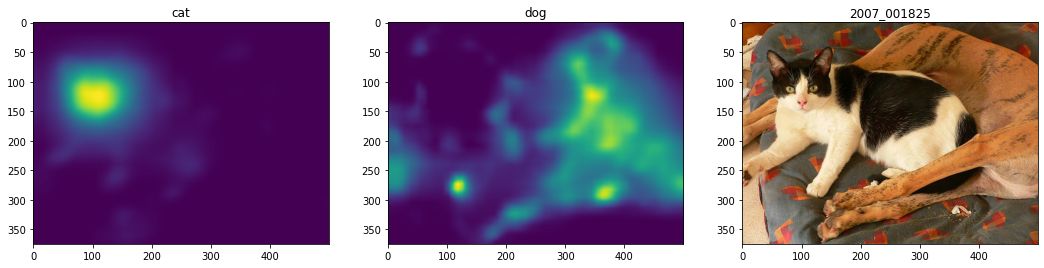

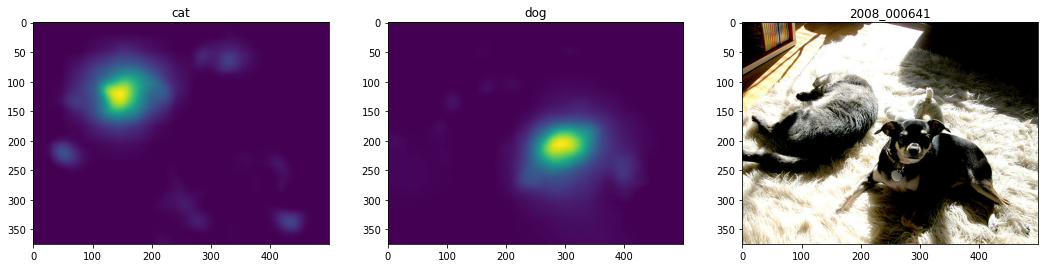

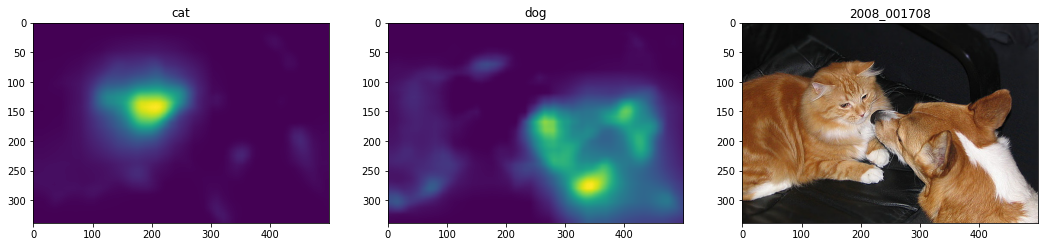

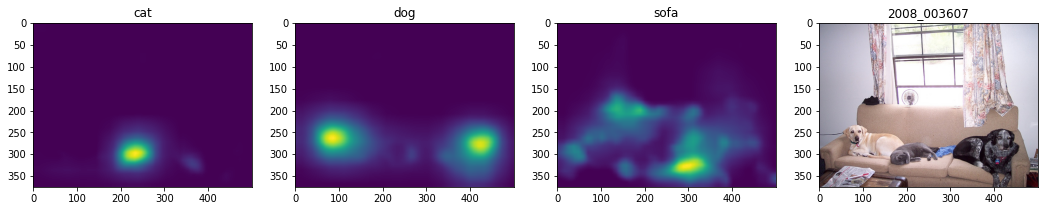

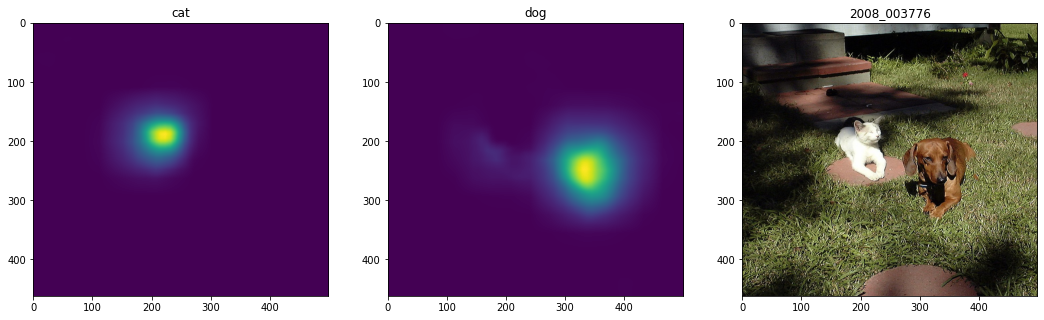

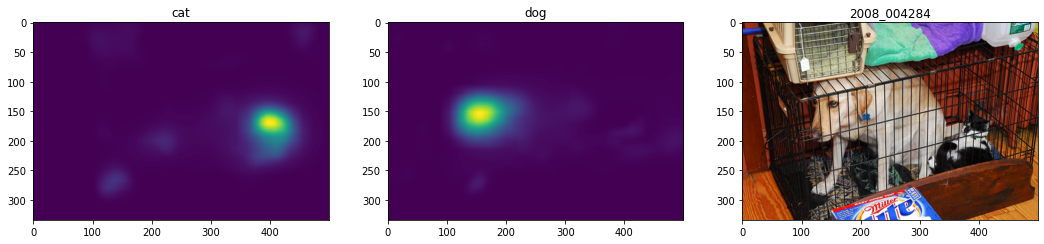

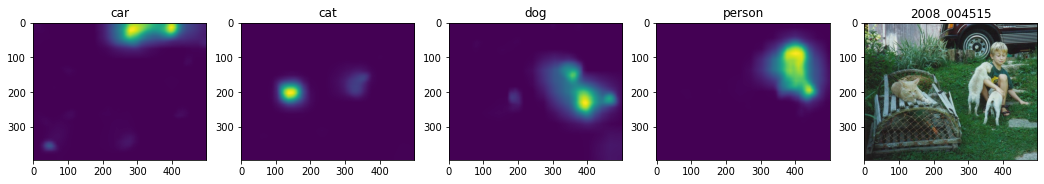

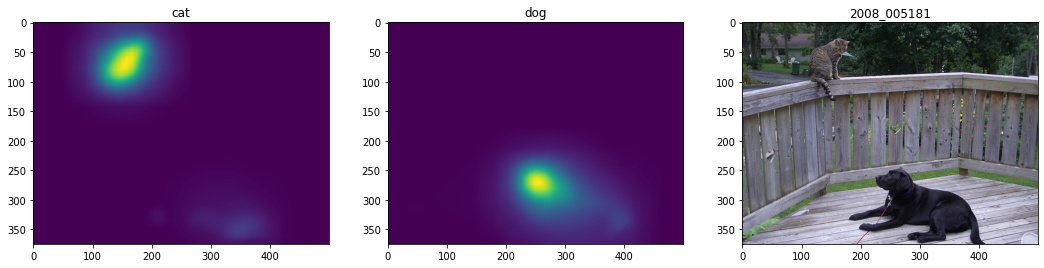

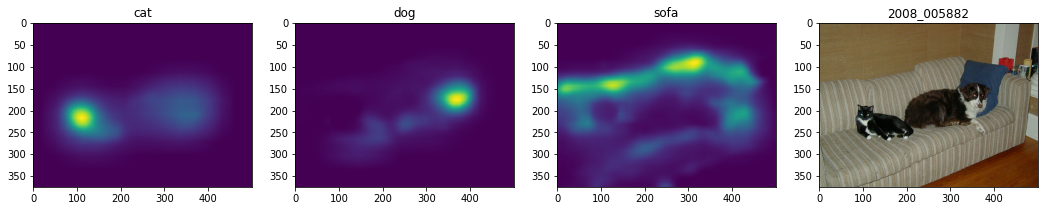

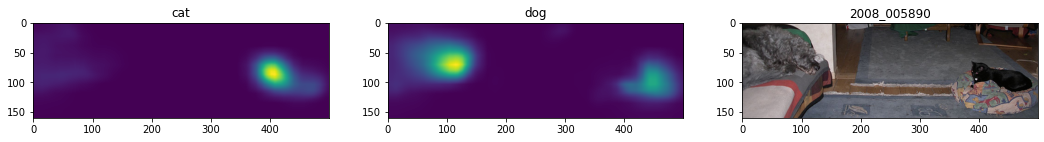

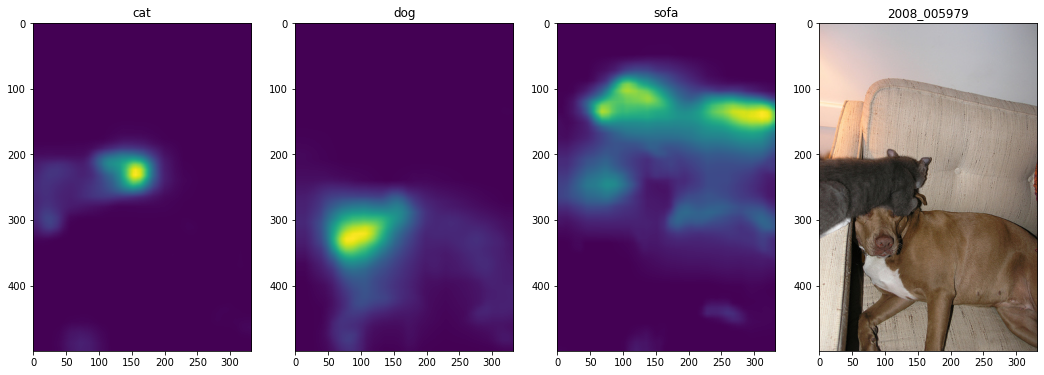

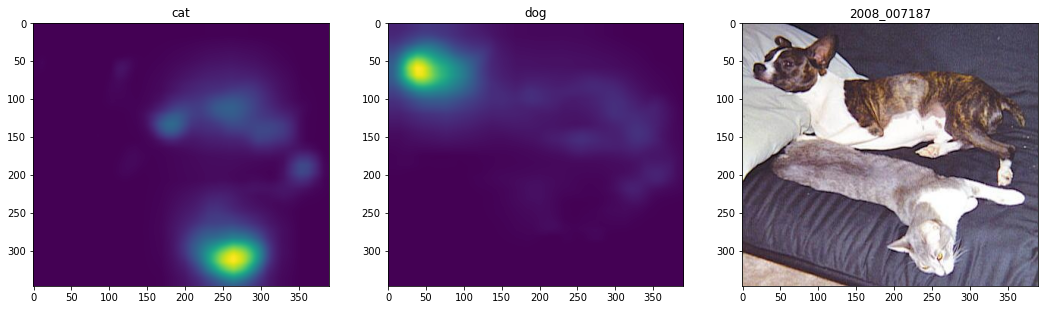

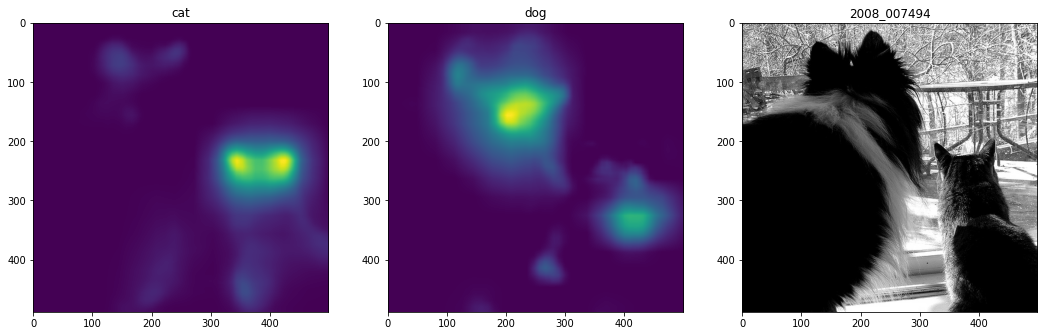

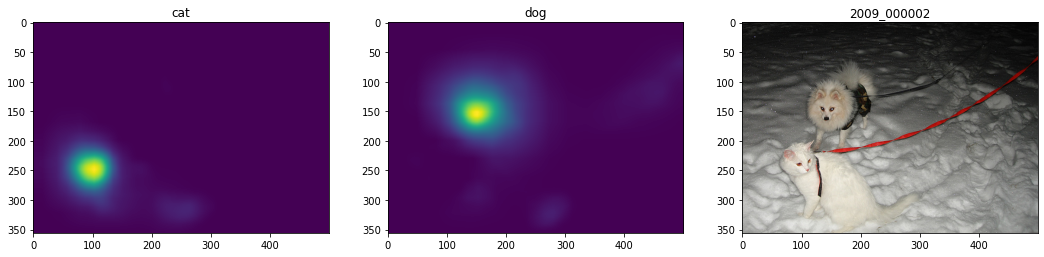

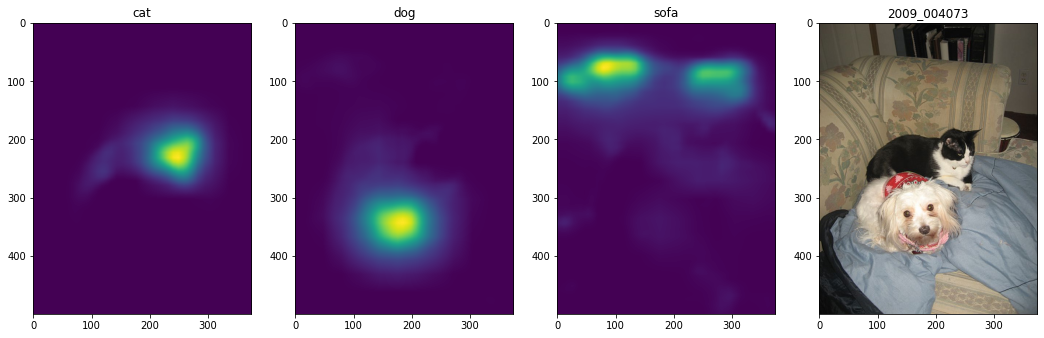

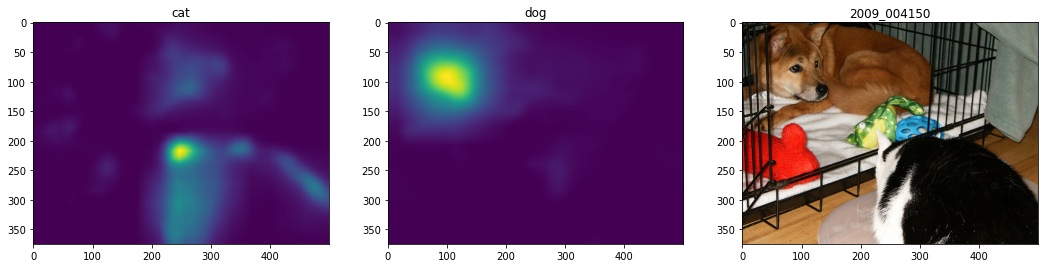

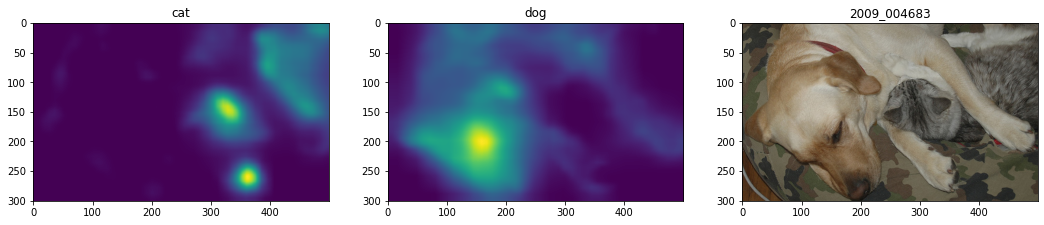

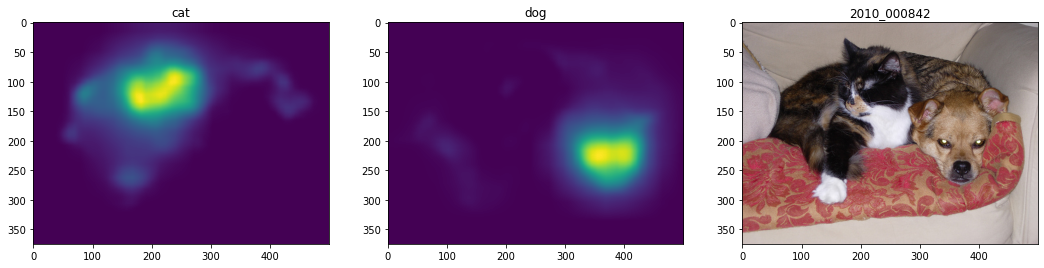

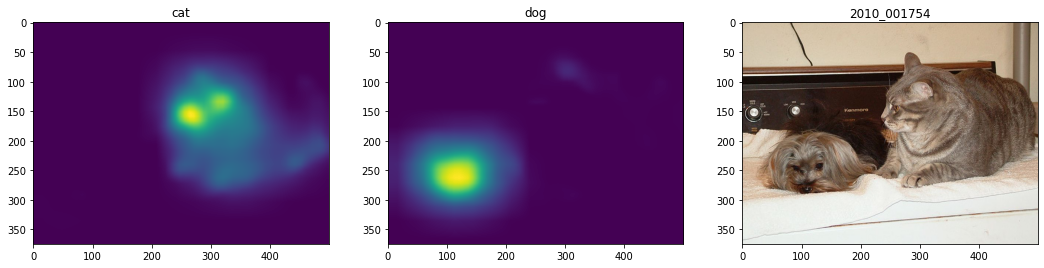

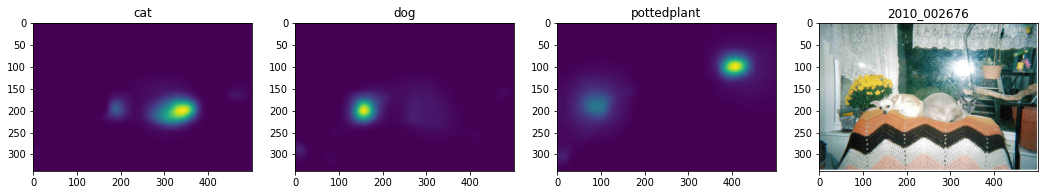

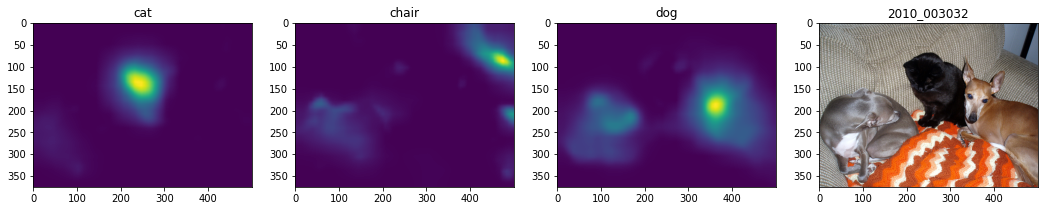

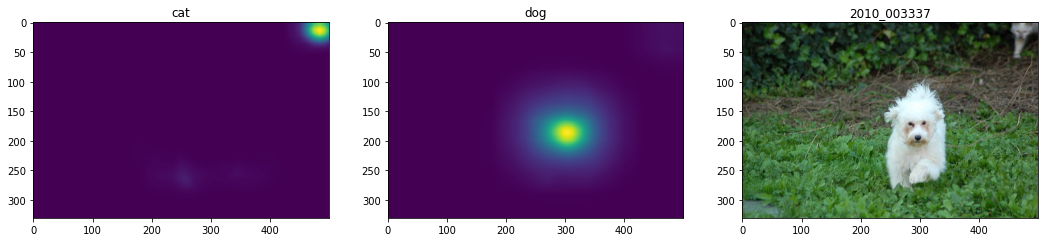

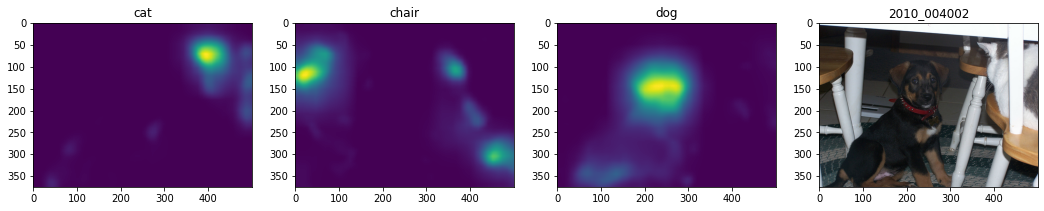

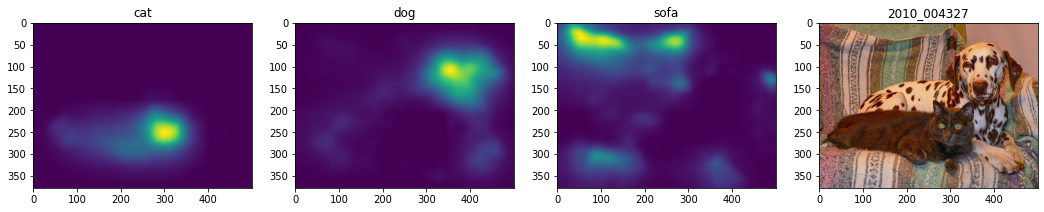

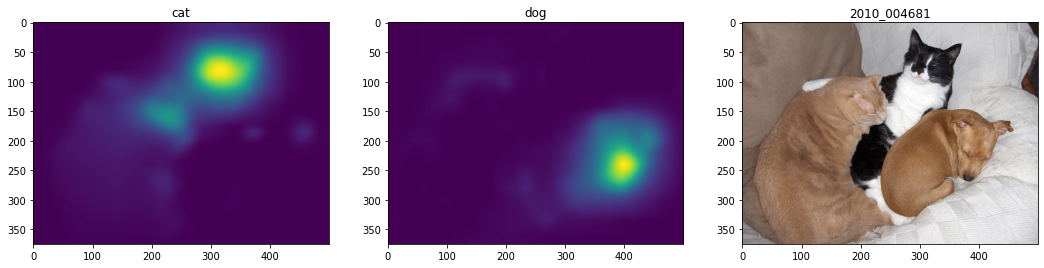

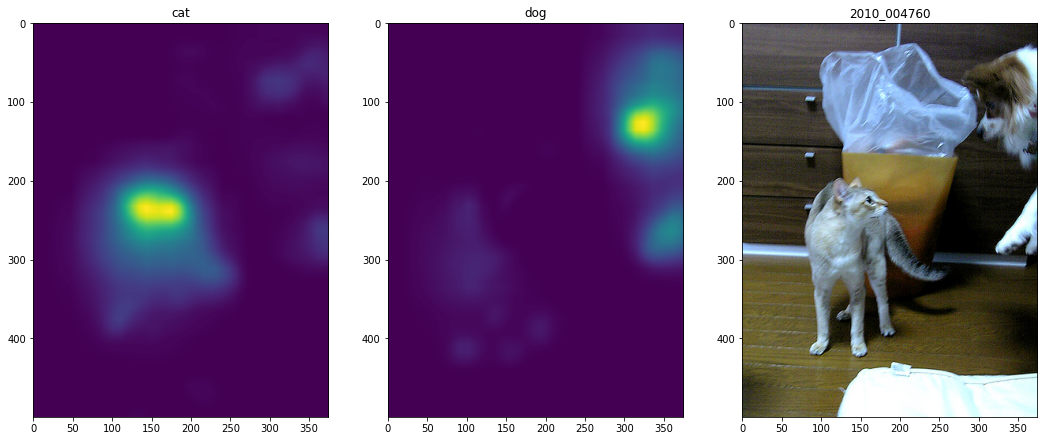

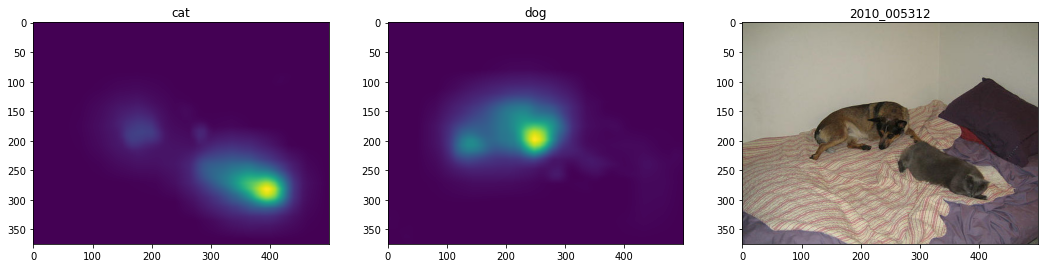

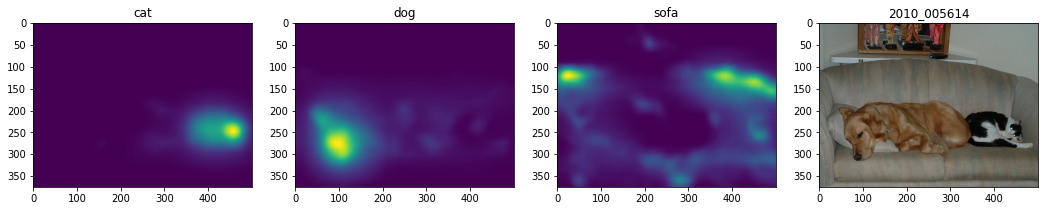

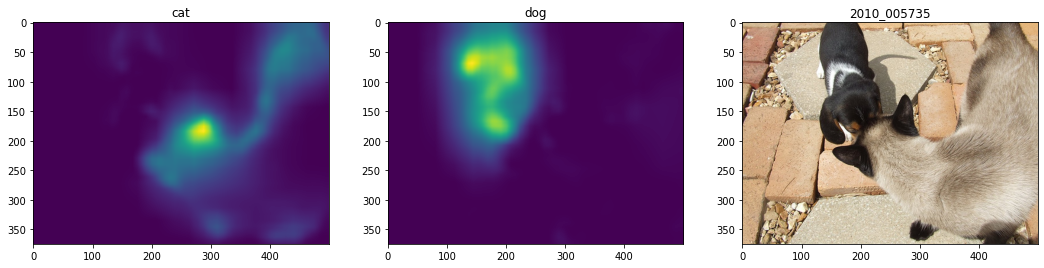

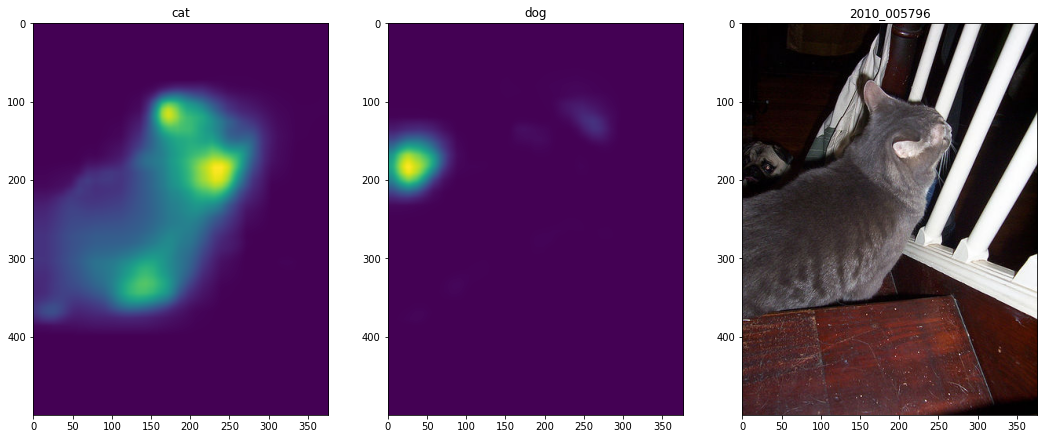

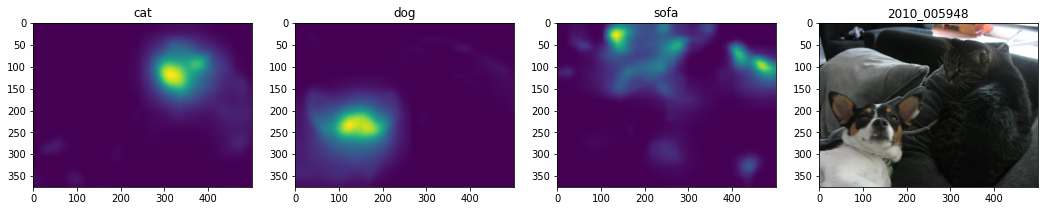

In [57]:
from PIL import Image
for pack in data_loader:
    label = pack['label'].numpy().tolist()[0]
    size = pack['size']
    if label[7] and label[11]:
        with torch.no_grad():
            strided_up_size = imutils.get_strided_up_size(size, 16)
            baseline_outputs = [model_baseline(img[0]) for img in pack['img']]
            baseline_highres_cam = [F.interpolate(torch.unsqueeze(
                        o, 1), strided_up_size, mode='bilinear', align_corners=False) for o in baseline_outputs]
            baseline_highres_cam = torch.sum(torch.stack(baseline_highres_cam, 0), 0)[
                        :, 0, :size[0], :size[1]]
            valid_cat = torch.nonzero(pack['label'][0])[:, 0]
            baseline_highres_cam = baseline_highres_cam[valid_cat]
            baseline_highres_cam /= F.adaptive_max_pool2d(baseline_highres_cam, (1, 1)) + 1e-5
        w = size[0].item()
        h = size[1].item()
        fig = plt.figure(figsize=(18, 18))
        columns = len(valid_cat) + 1
        rows = 1
        n = len(valid_cat)
        for i in range(1, n +1):
            img = baseline_highres_cam[i-1]
            img = img.unsqueeze(0).unsqueeze(0)
            fig.add_subplot(rows, columns, i)
            plt.imshow(img.numpy().squeeze())
            plt.title(CAT_LIST[valid_cat[i-1]])
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(Image.open(os.path.join(voc12_root, 'JPEGImages') + '/' + pack['name'][0] + '.jpg'))
        plt.title(pack['name'][0])
        plt.show()